In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("avocado.csv")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [5]:
df.head(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


This dataset contain 18249 rows and 14 column, We will perfrome both regression and classificatiom task here to see the model through two different angles one is keeping the Avg price an independent variable and second is keeping the region as an independent variable, to check out the final conclusion.

No, We will perform Data preprocessing

In [7]:
from sklearn.preprocessing import LabelEncoder
# Check for missing values
print(df.isnull().sum())

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract year and month from date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Encode categorical variables
label_encoder = LabelEncoder()
df['type'] = label_encoder.fit_transform(df['type'])
df['region'] = label_encoder.fit_transform(df['region'])

# Display the first few rows after preprocessing
df.head()


Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Year            0
Month           0
dtype: int64


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Year,Month
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,2015,12
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,2015,12
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,2015,12
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,2015,12
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,2015,11


In [8]:
df.columns
print('The Dimension of the dataset:',df.shape)
print('The Column header in the dataset:',df.columns)

The Dimension of the dataset: (18249, 16)
The Column header in the dataset: Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region', 'Year', 'Month'],
      dtype='object')


In [9]:
df.dtypes

Unnamed: 0               int64
Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                     int32
year                     int64
region                   int32
Year                     int32
Month                    int32
dtype: object

This dataset contain 4 data types i.e int(33,64), float64, datetime64[ns]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    18249 non-null  int64         
 1   Date          18249 non-null  datetime64[ns]
 2   AveragePrice  18249 non-null  float64       
 3   Total Volume  18249 non-null  float64       
 4   4046          18249 non-null  float64       
 5   4225          18249 non-null  float64       
 6   4770          18249 non-null  float64       
 7   Total Bags    18249 non-null  float64       
 8   Small Bags    18249 non-null  float64       
 9   Large Bags    18249 non-null  float64       
 10  XLarge Bags   18249 non-null  float64       
 11  type          18249 non-null  int32         
 12  year          18249 non-null  int64         
 13  region        18249 non-null  int32         
 14  Year          18249 non-null  int32         
 15  Month         18249 non-null  int32 

Here you can check all the properties of the dataset.

In [11]:
df.nunique().to_frame('No. of unique values')

,No. of unique values
Unnamed: 0,53
Date,169
AveragePrice,259
Total Volume,18237
4046,17702
4225,18103
4770,12071
Total Bags,18097
Small Bags,17321
Large Bags,15082


This shows that no two column has same no. of unique values present in the dataset.

In [12]:
print('total duplicate rows are', df.duplicated().sum())

total duplicate rows are 0


There is no duplicate rows are present in the dataset.

In [13]:
df.describe()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Year,Month
count,18249.000000,18249,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000
mean,24.232232,2016-08-13 23:30:43.498273792,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,2016.147899,26.495644,2016.147899,6.177215
min,0.000000,2015-01-04 00:00:00,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,2015.000000,0.000000,2015.000000,1.000000
25%,10.000000,2015-10-25 00:00:00,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,2015.000000,13.000000,2015.000000,3.000000
50%,24.000000,2016-08-14 00:00:00,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,2016.000000,26.000000,2016.000000,6.000000
75%,38.000000,2017-06-04 00:00:00,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,2017.000000,40.000000,2017.000000,9.000000
max,52.000000,2018-03-25 00:00:00,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,2018.000000,53.000000,2018.000000,12.000000
std,15.481045,NaN,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,0.939938,15.583788,0.939938,3.534130


In [16]:
num_col = ['Unnamed: 0', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region', 'Year', 'Month']
num_col

['Unnamed: 0',
 'AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'type',
 'year',
 'region',
 'Year',
 'Month']

In [19]:
df_num = df[num_col]
df_num.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Year,Month
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,2015,12
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,2015,12
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,2015,12
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,2015,12
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,2015,11


In [20]:
# Calculating skewness for each numerical column
skewness = df_num.skew()
print("Skewness of numerical columns:\n", skewness)


Skewness of numerical columns:
 Unnamed: 0       0.108334
AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
Year             0.215339
Month            0.106617
dtype: float64


In [21]:
# Calculating IQR for each numerical column
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1

# Identifying outliers
outliers = ((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).sum()
print("Number of outliers in each numerical column:\n", outliers)


Number of outliers in each numerical column:
 Unnamed: 0         0
AveragePrice     209
Total Volume    2297
4046            2518
4225            2519
4770            2918
Total Bags      2533
Small Bags      2407
Large Bags      2707
XLarge Bags     4014
type               0
year               0
region             0
Year               0
Month              0
dtype: int64


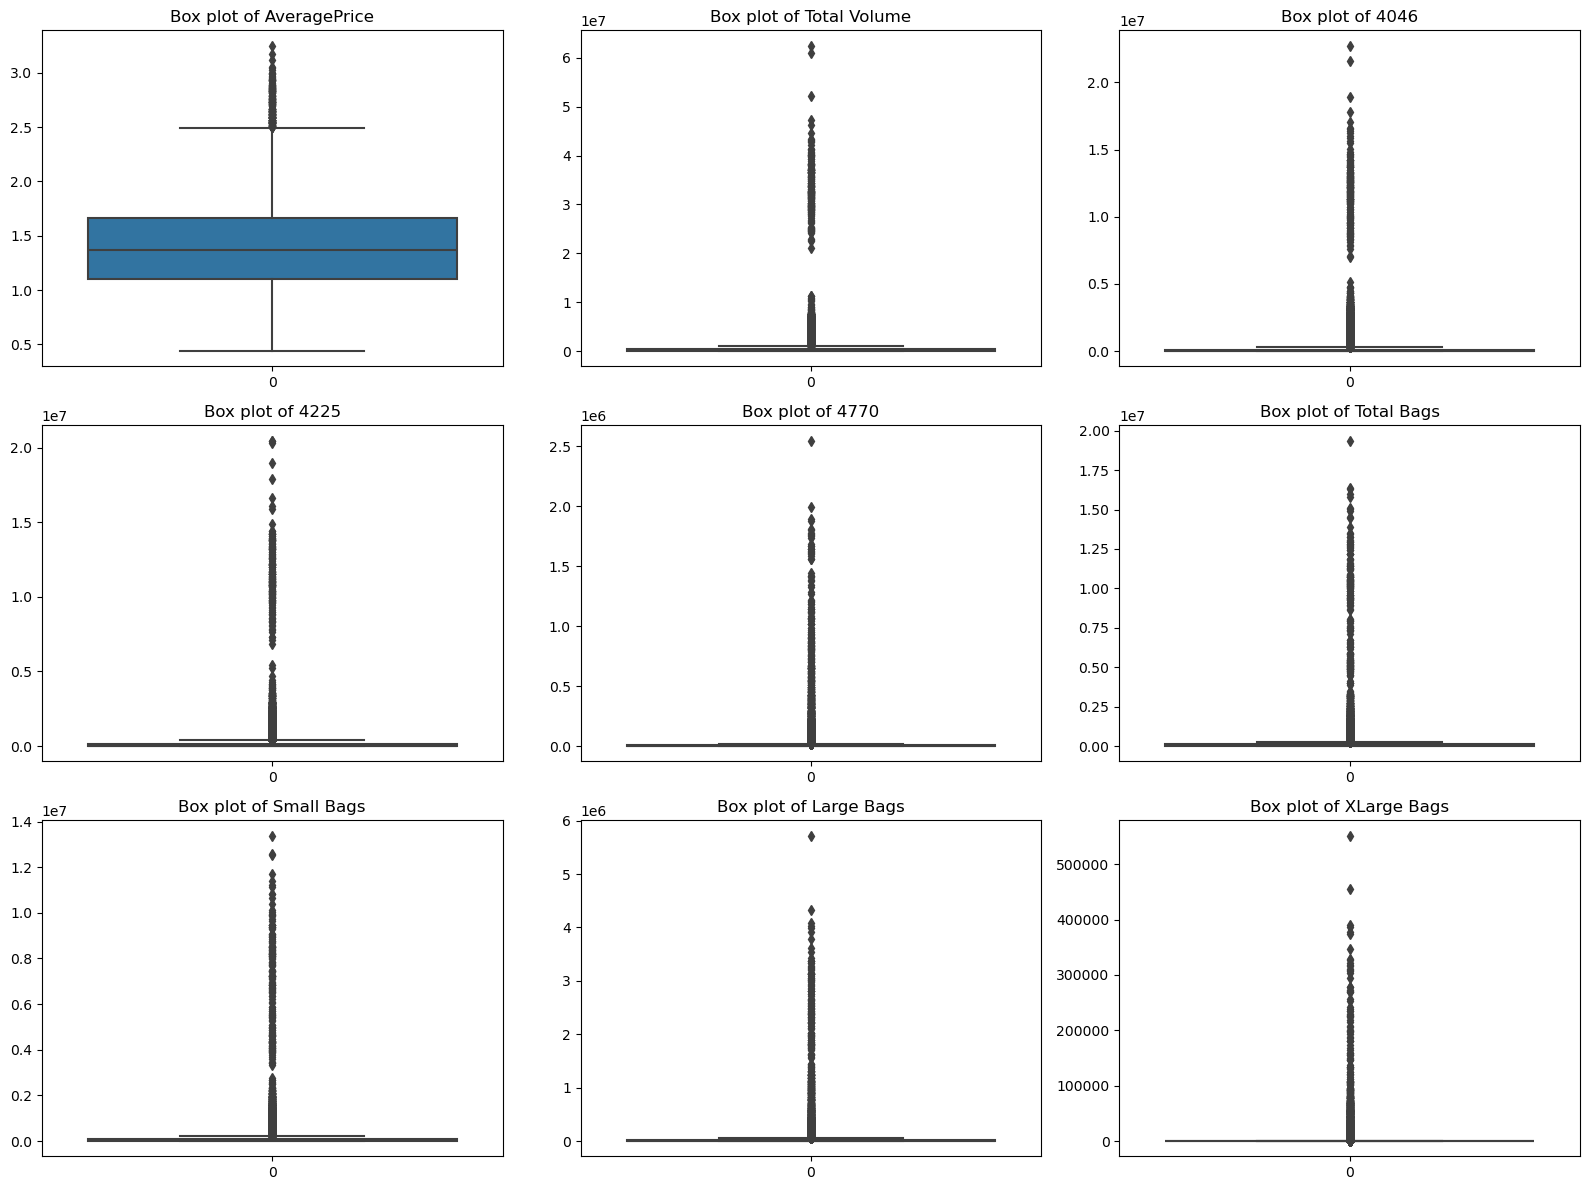

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing outliers using box plots
plt.figure(figsize=(16, 12))

# List of numerical features to plot
numerical_features = ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 
                      'Small Bags', 'Large Bags', 'XLarge Bags']

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(df_num[feature])
    plt.title(f'Box plot of {feature}')

plt.tight_layout()
plt.show()


So we have found outlier in all the columns. So we will remove the outliers using the zscore and IQR techniques before building the model and selecting the best one.

In [24]:
from scipy.stats import zscore
z = np.abs(zscore(df_num))
z

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Year,Month
0,1.565327,0.188689,0.227716,0.230816,0.199902,0.212091,0.234170,0.232647,0.222352,0.17558,0.999836,1.221282,1.700252,1.221282,1.647632
1,1.500730,0.139020,0.230427,0.231103,0.208054,0.211997,0.233350,0.231568,0.222335,0.17558,0.999836,1.221282,1.700252,1.221282,1.647632
2,1.436133,1.182069,0.212085,0.231007,0.154478,0.211325,0.234730,0.233399,0.222311,0.17558,0.999836,1.221282,1.700252,1.221282,1.647632
3,1.371536,0.809551,0.223444,0.230741,0.185350,0.211864,0.237096,0.236568,0.222186,0.17558,0.999836,1.221282,1.700252,1.221282,1.647632
4,1.306939,0.312861,0.231538,0.230891,0.208719,0.211834,0.236718,0.236154,0.221924,0.17558,0.999836,1.221282,1.700252,1.221282,1.364669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.113149,0.556347,0.241373,0.230017,0.243857,0.212540,0.229301,0.226665,0.220964,0.17558,1.000164,1.970504,1.700811,1.970504,1.181997
18245,1.048552,0.755023,0.242296,0.230693,0.242277,0.212540,0.233594,0.232196,0.221403,0.17558,1.000164,1.970504,1.700811,1.970504,1.464959
18246,0.983955,1.152375,0.242331,0.230693,0.243090,0.205766,0.233463,0.231644,0.222561,0.17558,1.000164,1.970504,1.700811,1.970504,1.464959
18247,0.919358,1.301382,0.241625,0.230428,0.242651,0.205774,0.231866,0.229543,0.222529,0.17558,1.000164,1.970504,1.700811,1.970504,1.464959


In [25]:
#putting thrushold = 3 then 99.7% of the data comes under the bell-shaped curve
np.where(z>3)

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64),
 array([3, 3, 9, ..., 1, 1, 1], dtype=int64))

In [26]:
#Now we will remove the data above zscore and creating new DF.
df1= df_num[(z<3).all(axis=1)]
print("New Data Frame:",df1.shape)
print("Old Data Frame:",df_num.shape)

New Data Frame: (17651, 15)
Old Data Frame: (18249, 15)


In [27]:
print("Data loss Perc%", ((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data loss Perc% 3.276891884486821


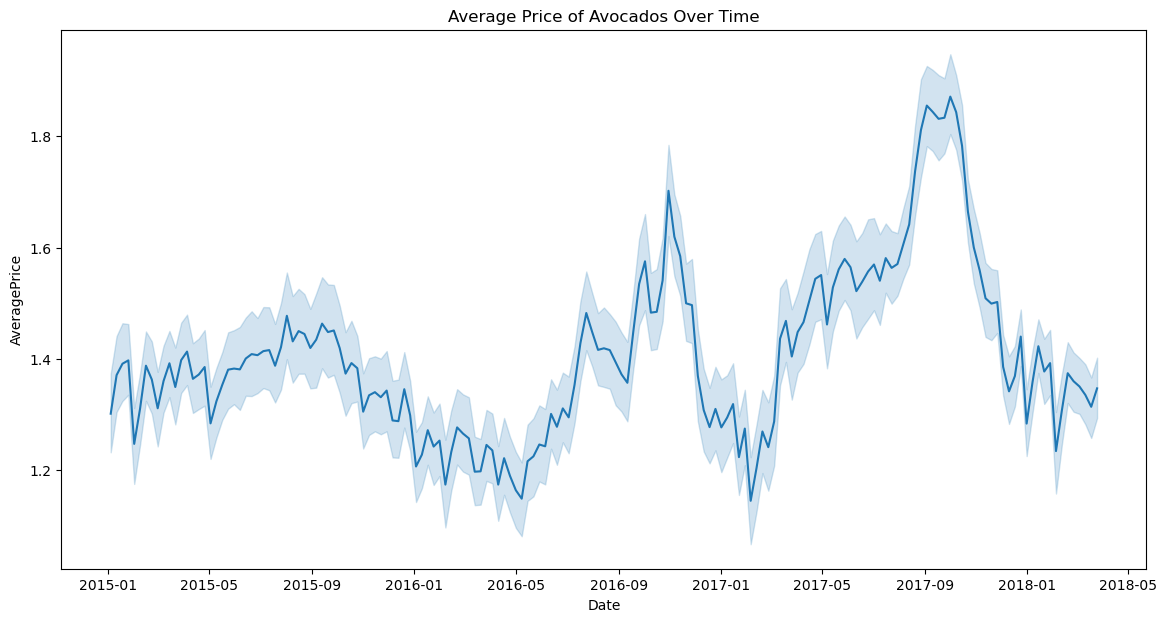

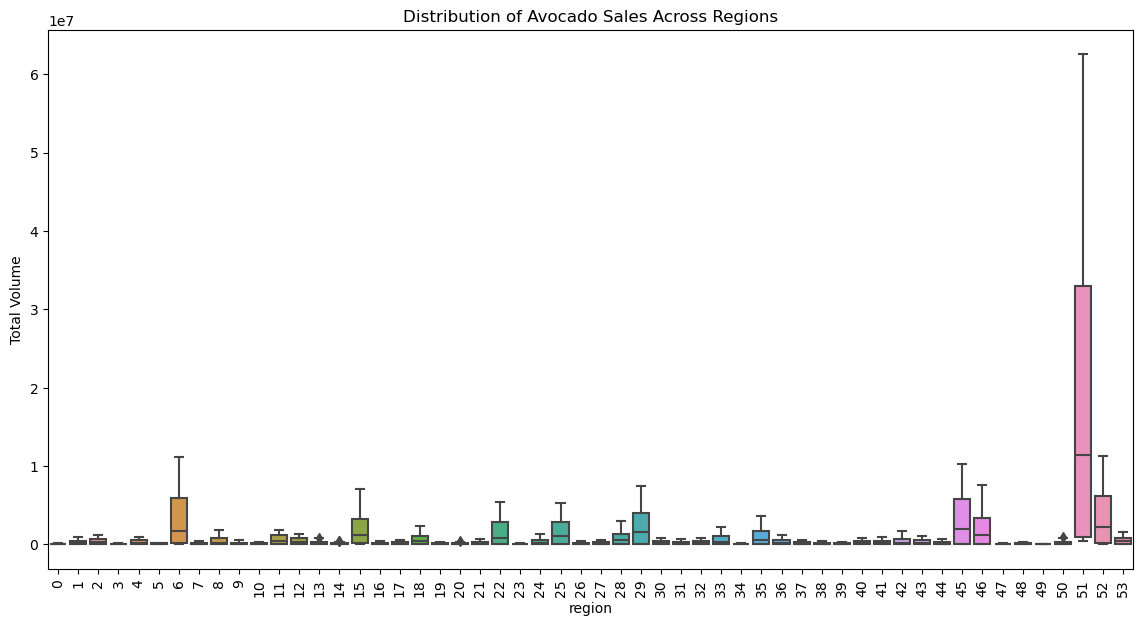

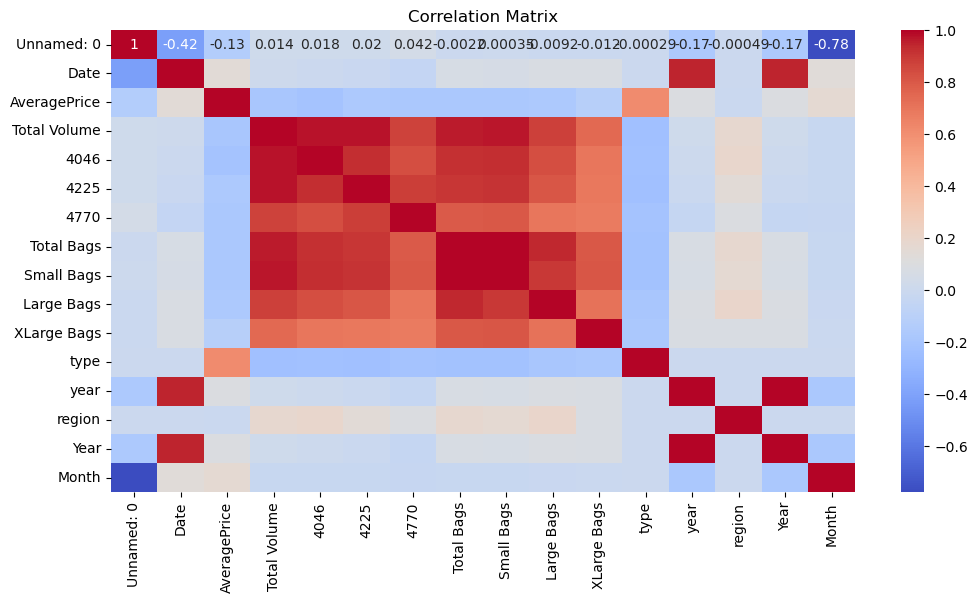

In [28]:
# Average price trend over time
plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='AveragePrice', data=df)
plt.title('Average Price of Avocados Over Time')
plt.show()

# Distribution of sales across regions
plt.figure(figsize=(14, 7))
sns.boxplot(x='region', y='Total Volume', data=df)
plt.title('Distribution of Avocado Sales Across Regions')
plt.xticks(rotation=90)
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


This gives the correlation between the dependent and independent variables.

Now we will Prepare the data for regression to predict the Avg price.

In [29]:
# Seperating the independent variables and atarget variables into x and y
x = df1.drop("AveragePrice", axis= 1 )
y = df1['AveragePrice']

print('Feature Dimension=', x.shape)
print('Label Dimension', y.shape)

Feature Dimension= (17651, 14)
Label Dimension (17651,)


In [30]:
# REGRESSION ALGORITHIMS 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso, Ridge


Creating train test split

In [35]:
# finding the best random state
maxAccu=0
maxRS=0
for i in range (1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=.30, random_state=i)
    lr=LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS=i
print('Maximum r score is ', maxAccu,'On random_state ',maxRS ) 

Maximum r score is  0.4647830052809273 On random_state  6


In [36]:
LR = LinearRegression()
LR.fit(x_train,y_train)
pred_LR = LR.predict(x_test)
pred_train = LR.predict(x_train)
print(LR)
print('R2_score:',r2_score(y_test,pred_LR))
print("R2_score on training data:",r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test, pred_LR))
print("Mean Squared Error",mean_squared_error(y_test,pred_LR))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_LR)))

LinearRegression()
R2_score: 0.4488603138134467
R2_score on training data: 44.30712804691686
Mean Absolute Error: 0.21960939909350916
Mean Squared Error 0.07937503602867134
Root Mean Squared Error: 0.28173575568016096


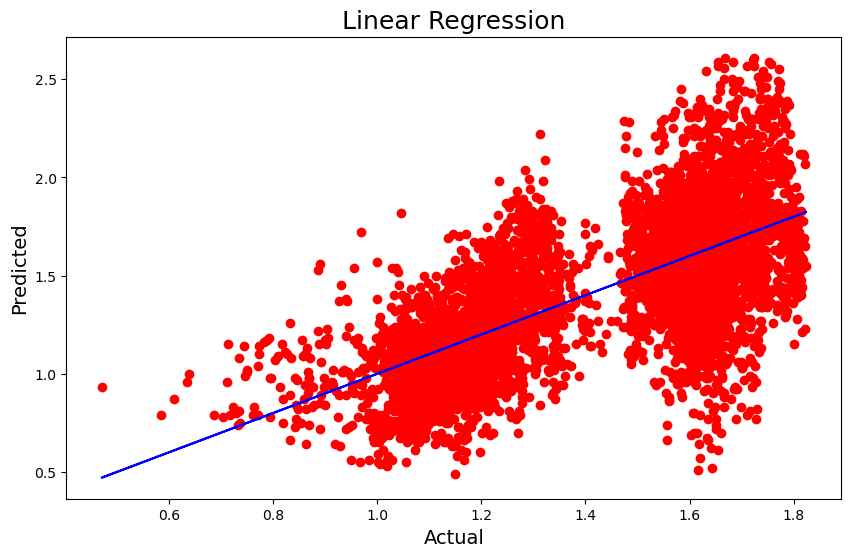

In [37]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_LR,y=y_test,color= 'r')
plt.plot(pred_LR, pred_LR,color='b')
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Linear Regression', fontsize=18)
plt.show()

In [38]:
RFR= RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR = RFR.predict(x_test)
pred_train = RFR.predict(x_train)
print(RFR)
print('R2_score:',r2_score(y_test,pred_RFR))
print("R2_score on training data:",r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test, pred_RFR))
print("Mean Squared Error",mean_squared_error(y_test,pred_RFR))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_RFR)))

RandomForestRegressor()
R2_score: 0.8879788508499905
R2_score on training data: 98.38347067865503
Mean Absolute Error: 0.08957456570996977
Mean Squared Error 0.016133265254909362
Root Mean Squared Error: 0.12701679123214127


In [39]:
GBR= GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR = GBR.predict(x_test)
pred_train = GBR.predict(x_train)
print(GBR)
print('R2_score:',r2_score(y_test,pred_GBR))
print("R2_score on training data:",r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test, pred_GBR))
print("Mean Squared Error",mean_squared_error(y_test,pred_GBR))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_GBR)))

GradientBoostingRegressor()
R2_score: 0.7482775501545211
R2_score on training data: 76.47836021387391
Mean Absolute Error: 0.14625418943561067
Mean Squared Error 0.03625302083390014
Root Mean Squared Error: 0.19040226057980547


In [40]:
Knn=KNN()
Knn.fit(x_train,y_train)
pred_Knn = Knn.predict(x_test)
pred_train = Knn.predict(x_train)
print(Knn)
print('R2_score:',r2_score(y_test,pred_Knn))
print("R2_score on training data:",r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test, pred_Knn))
print("Mean Squared Error",mean_squared_error(y_test,pred_Knn))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_Knn)))

KNeighborsRegressor()
R2_score: 0.6520017260269463
R2_score on training data: 77.27850447687017
Mean Absolute Error: 0.16259705438066463
Mean Squared Error 0.050118647280966766
Root Mean Squared Error: 0.22387194393439916


We will check for cross validation score.

In [42]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(GBR,x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and Cross Validation Score is",(r2_score(y_test,pred_GBR)-score.mean())*100)

[0.08734839 0.56265352 0.64881128 0.29195319 0.2440053 ]
0.3669543343687277
Difference between R2 score and Cross Validation Score is 38.132321578579344


In [43]:
score1 = cross_val_score(RFR,x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and Cross Validation Score is",(r2_score(y_test,pred_RFR)-score.mean())*100)

[0.08734839 0.56265352 0.64881128 0.29195319 0.2440053 ]
0.3669543343687277
Difference between R2 score and Cross Validation Score is 52.10245164812628


In [44]:
score2 = cross_val_score(LR,x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and Cross Validation Score is",(r2_score(y_test,pred_LR)-score.mean())*100)

[0.08734839 0.56265352 0.64881128 0.29195319 0.2440053 ]
0.3669543343687277
Difference between R2 score and Cross Validation Score is 8.1905979444719


From the diff of both r2 score and cross validation score computed on r2 score we conclude that Randomforest regressor is our best fit and now we use hyper paramter to get the best model.

In [46]:
# Performing Hyperparameter tuning.
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [49]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [50]:
model = RandomForestRegressor()
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             verbose=2)

In [51]:
  best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [53]:
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(x_test)
# Evaluate the tuned model
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

print(f"Tuned Model Mean Squared Error: {mse_tuned}")
print(f"Tuned Model R-squared: {r2_tuned*100}")

Tuned Model Mean Squared Error: 0.015498759620783294
Tuned Model R-squared: 89.23845337141788


So our model is performing well in predicting the Average price now lets lets perform the Classification task on Region.

In [57]:
from sklearn.preprocessing import StandardScaler



x = df1.drop("region", axis = 1) 
y = df1['region']

scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

We have scaled the data using Standard Scalarization method to overcome the issue of biasness.

In [59]:
#creating tain test split
x_train, x_test, y_train,y_test = train_test_split(x,y, test_size= .30, random_state= maxRS)

In [60]:
#CLASSFICATION ALGORITHMS
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [61]:
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, predRFC))


0.9182401812688822
[[ 94   0   0 ...   0   0   0]
 [  0 103   0 ...   0   0   0]
 [  0   0 111 ...   0   0   0]
 ...
 [  0   0   0 ...  55   0   0]
 [  0   0   0 ...   0  79   0]
 [  0   1   0 ...   0   0  89]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       102
           1       0.86      0.89      0.87       116
           2       0.97      0.97      0.97       114
           3       0.83      0.87      0.85        77
           4       0.99      0.99      0.99        90
           5       0.90      0.91      0.91        92
           6       0.99      0.99      0.99        80
           7       0.92      0.92      0.92       119
           8       0.99      0.99      0.99       101
           9       0.92      0.85      0.88       106
          10       0.90      0.90      0.90       104
          11       0.93      0.94      0.94       118
          12       0.91      0.96      0.93        94
          13       0.85      0.8

In [70]:
LR  = LogisticRegression()
LR.fit(x_train, y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test, predLR))

0.15445619335347432
[[ 1  0  0 ...  0  0  0]
 [ 0  9  0 ...  2  1  1]
 [ 1  0 44 ...  0  0  0]
 ...
 [ 0  0  0 ... 36  8  0]
 [ 0  0  0 ... 18 22  0]
 [ 0  0  1 ...  4  5  7]]
              precision    recall  f1-score   support

           0       0.02      0.01      0.01       102
           1       0.19      0.08      0.11       116
           2       0.38      0.39      0.38       114
           3       0.00      0.00      0.00        77
           4       0.25      0.22      0.23        90
           5       0.07      0.20      0.10        92
           6       0.14      0.34      0.20        80
           7       0.00      0.00      0.00       119
           8       0.81      0.42      0.55       101
           9       0.10      0.36      0.16       106
          10       0.00      0.00      0.00       104
          11       0.07      0.01      0.02       118
          12       0.19      0.41      0.26        94
          13       0.37      0.42      0.39        98
          14 

In [62]:
svc = SVC()
svc.fit(x_train, y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predsvc))

0.24546827794561935
[[27  0  0 ...  0  0  0]
 [ 0 17  0 ...  0  0  1]
 [ 0  0 45 ...  0  0  0]
 ...
 [ 0  0  0 ... 37  0  0]
 [ 0  0  0 ...  0 21  0]
 [ 0  2  0 ...  0  0 39]]
              precision    recall  f1-score   support

           0       0.52      0.26      0.35       102
           1       0.71      0.15      0.24       116
           2       0.92      0.39      0.55       114
           3       0.03      0.97      0.06        77
           4       0.82      0.30      0.44        90
           5       0.11      0.35      0.17        92
           6       0.81      0.38      0.51        80
           7       0.00      0.00      0.00       119
           8       0.95      0.36      0.52       101
           9       0.51      0.21      0.30       106
          10       0.00      0.00      0.00       104
          11       0.79      0.31      0.45       118
          12       0.60      0.26      0.36        94
          13       0.44      0.22      0.30        98
          14 

In [65]:
ABC = AdaBoostClassifier()
ABC.fit(x_train, y_train)
predABC = ABC.predict(x_test)
print(accuracy_score(y_test, predABC))
print(confusion_matrix(y_test, predABC))
print(classification_report(y_test, predABC))

0.0625
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       102
           1       0.00      0.00      0.00       116
           2       0.00      0.00      0.00       114
           3       0.00      0.00      0.00        77
           4       0.00      0.00      0.00        90
           5       0.00      0.00      0.00        92
           6       0.00      0.00      0.00        80
           7       0.00      0.00      0.00       119
           8       0.00      0.00      0.00       101
           9       0.00      0.00      0.00       106
          10       0.00      0.00      0.00       104
          11       0.00      0.00      0.00       118
          12       0.00      0.00      0.00        94
          13       0.00      0.00      0.00        98
          14       0.00      0.00      0.00        90
        

In [66]:
BC = BaggingClassifier()
BC.fit(x_train, y_train)
predBC = BC.predict(x_test)
print(accuracy_score(y_test, predBC))
print(confusion_matrix(y_test, predBC))
print(classification_report(y_test, predBC))

0.8644259818731118
[[ 87   0   0 ...   0   0   0]
 [  0  99   0 ...   0   0   0]
 [  0   0 106 ...   0   0   0]
 ...
 [  0   0   0 ...  55   0   0]
 [  0   0   0 ...   0  74   0]
 [  0   4   1 ...   0   0  79]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.87       102
           1       0.75      0.85      0.80       116
           2       0.95      0.93      0.94       114
           3       0.79      0.82      0.80        77
           4       0.94      0.91      0.93        90
           5       0.82      0.89      0.85        92
           6       0.98      0.99      0.98        80
           7       0.84      0.90      0.87       119
           8       0.94      0.96      0.95       101
           9       0.88      0.83      0.85       106
          10       0.78      0.87      0.82       104
          11       0.91      0.91      0.91       118
          12       0.92      0.87      0.90        94
          13       0.78      0.8

In [67]:
ET = ExtraTreesClassifier()
ET.fit(x_train, y_train)
predET = ET.predict(x_test)
print(accuracy_score(y_test, predET))
print(confusion_matrix(y_test, predET))
print(classification_report(y_test, predET))

0.9169184290030211
[[ 97   0   0 ...   0   0   0]
 [  0 102   0 ...   0   0   0]
 [  0   0 114 ...   0   0   0]
 ...
 [  0   0   0 ...  55   0   0]
 [  0   0   0 ...   0  79   0]
 [  0   2   0 ...   0   0  91]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       102
           1       0.89      0.88      0.88       116
           2       0.96      1.00      0.98       114
           3       0.91      0.91      0.91        77
           4       0.99      0.98      0.98        90
           5       0.88      0.89      0.89        92
           6       1.00      0.99      0.99        80
           7       0.94      0.97      0.96       119
           8       0.99      0.99      0.99       101
           9       0.82      0.87      0.84       106
          10       0.88      0.85      0.86       104
          11       0.91      0.92      0.91       118
          12       0.93      0.93      0.93        94
          13       0.83      0.7

In [69]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(RFC, x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross val score is - ', accuracy_score(y_test, predRFC)-score.mean())

[0.62192014 0.80906516 0.74050992 0.698017   0.49121813]
0.6721460668478223
Difference between Accuracy score and cross val score is -  0.24609411442105988


In [71]:
score = cross_val_score(LR, x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross val score is - ', accuracy_score(y_test, predLR)-score.mean())

[0.19314642 0.23824363 0.14872521 0.0674221  0.03626062]
0.13675959510382746
Difference between Accuracy score and cross val score is -  0.017696598249646867


In [73]:
score = cross_val_score(svc, x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross val score is - ', accuracy_score(y_test, predsvc)-score.mean())

[0.37099972 0.52124646 0.22407932 0.02521246 0.02719547]
0.23374668556845357
Difference between Accuracy score and cross val score is -  0.011721592377165774


In [74]:
score = cross_val_score(BC, x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross val score is - ', accuracy_score(y_test, predBC)-score.mean())

[0.5383744  0.74674221 0.6815864  0.63116147 0.45439093]
0.6104510836035022
Difference between Accuracy score and cross val score is -  0.2539748982696096


In [75]:
score = cross_val_score(ET, x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross val score is - ', accuracy_score(y_test, predET)-score.mean())

[0.65675446 0.77082153 0.71983003 0.58385269 0.34249292]
0.6147503255263177
Difference between Accuracy score and cross val score is -  0.3021681034767034


Random forest classifier is our best model as the diff between Accuracy and corss val score is the least.

In [80]:
#Hyper Parameter tuning 
#Random forst Classifier 
from sklearn.model_selection import GridSearchCV

parameters = {    'criterion': ['gini', 'entropy'],
    'random_state': [10, 20],
    'max_depth': [ 10, 20], 
    'n_jobs': [-2, 1], 
    'n_estimators': [10, 50] 
             }

In [81]:
GCV =GridSearchCV(RandomForestClassifier(), parameters, cv=5)

In [82]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20], 'n_estimators': [10, 50],
                         'n_jobs': [-2, 1], 'random_state': [10, 20]})

In [83]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'n_estimators': 50,
 'n_jobs': -2,
 'random_state': 10}

In [84]:
Final_model = RandomForestClassifier(criterion= 'entropy', max_depth= 10, n_estimators= 50, n_jobs= -2, random_state= 10)
Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test, pred)
print(acc*100)

86.38595166163142


Conclusion
So our model is showing 86percent accuracy in showing the predictions of the region. And on Regression model its showing 89percent accurany in predecting the Avg price.